In [53]:
import pandas as pd

In [54]:
avalanche_set = pd.read_csv('newData/gesamt_set_1.csv', sep=',')

In [55]:
avalanche_set['ID'] = avalanche_set['ID'].fillna(0)
avalanche_set = avalanche_set.drop([ 'Datum','Intervall', 'ID'], axis=1)
avalanche_set = avalanche_set.dropna()
avalanche_set

,Schneehöhe,Schneehöhe_Norm,Niederschlag,Lufttemperatur_7h,Lufttemperatur_7h_Norm,Lufttemperatur_7h_Gew,Lufttemperatur_14h,Lufttemperatur_14h_Norm,Lufttemperatur_14h_Gew,Lufttemperatur_19h,...,Lufttemperatur_last2,Lufttemperatur_last3,Lufttemperatur_last4,meanExpo,meanSlope,stdDevSlope,MinSlope,MaxSlope,Altitude,Avalanche
0,20.0,29.371271,0.0,-1.4,-11.2,99999.0,2.6,20.8,99999.0,4.6,...,0.000000,0.000000,0.000000,240.622592,40.215386,6.827700,3.598443,60.656714,2925.378871,0
1,19.0,26.654976,0.0,3.9,31.2,-5.6,3.5,28.0,10.4,3.2,...,0.000000,0.000000,0.000000,86.721312,43.193688,9.617375,0.000000,71.591813,2461.506438,0
2,19.0,27.313567,9.1,7.6,60.8,15.6,4.7,37.6,14.0,2.7,...,15.466667,0.000000,0.000000,95.782919,42.465800,8.184500,0.000000,61.137880,2423.430860,0
3,4.0,5.611574,5.3,-6.0,-48.0,30.4,-7.6,-60.8,18.8,-4.4,...,28.266667,15.466667,0.000000,236.817015,36.165750,5.320700,23.699150,52.545750,2344.716550,0
4,10.0,13.894920,7.3,-5.1,-40.8,-24.0,-4.2,-33.6,-30.4,-2.7,...,40.000000,28.266667,15.466667,271.664767,41.924600,4.659500,33.076000,54.920900,1980.761100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,175.0,162.359178,16.0,-9.0,-72.0,-36.0,-1.0,-8.0,-40.0,-1.0,...,-40.000000,-10.666667,2.666667,62.004911,41.474100,8.876500,1.418093,65.950220,2223.063053,1
7017,155.0,141.483293,8.0,4.0,32.0,-36.0,8.0,64.0,-4.0,5.0,...,-80.000000,-40.000000,-10.666667,86.721312,43.193688,9.617375,0.000000,71.591813,2461.506438,0
7018,149.0,134.537246,0.0,-1.0,-8.0,16.0,1.0,8.0,32.0,-1.0,...,-29.333333,-80.000000,-40.000000,2.980625,37.066700,6.003100,13.586900,50.025850,1967.563900,0
7019,144.0,129.792371,0.0,-2.0,-16.0,-4.0,-6.0,-48.0,4.0,-10.0,...,45.333333,-29.333333,-80.000000,98.851562,41.040858,8.651008,6.873767,71.013708,2637.582267,0


In [56]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import cross_val_score
import statistics

feature_names = avalanche_set.columns.drop('Avalanche')
X = avalanche_set[avalanche_set.columns.drop('Avalanche')]
y = avalanche_set['Avalanche']

svc = make_pipeline(StandardScaler(), svm.SVC())

cvs = cross_val_score(svc, X, y, cv=10)

In [57]:
print(statistics.mean(cvs))

0.7309426835742625


In [58]:
cvs = cross_val_score(svc, X, y, cv=10, scoring="precision")

In [59]:
print(statistics.mean(cvs))

0.7068159043618404


In [60]:
cvs = cross_val_score(svc, X, y, cv=5, scoring="precision")

In [61]:
print(statistics.mean(cvs))

0.6985686247639652


In [62]:
cvs = cross_val_score(svc, X, y, cv=10, scoring="recall")

In [63]:
print(statistics.mean(cvs))

0.5259162880352471


In [64]:
features_selected_set = avalanche_set[['Schneehöhe',
                                       'Lufttemperatur_7h',
                                       'Lufttemperatur_14h_Norm',
                                       'Lufttemperatur_14h_Gew',
                                       'Lufttemperatur_19h',
                                       'Lufttemperatur_19h_Norm',
                                       'Lufttemperatur_19h_Gew',
                                       'Schneetemperatur',
                                       'Schneetemperatur_Norm',
                                       'Schneetemperatur_Gew',
                                       'Windstärke',
                                       'Windstärke_Gew',
                                       'Einsinktiefe_Gew',
                                       'Wetter_akt',
                                       'Wetter_gestern',
                                       'Wolken',
                                       'Neuschnee_x',
                                       'Neuschnee_Norm',
                                       'Neuschnee_last4',
                                       'Lufttemperatur_last4',
                                       'meanExpo',
                                       'meanSlope',
                                       'MinSlope',
                                       'MaxSlope',
                                       'Altitude',
                                       'Avalanche']]
features_selected_set

,Schneehöhe,Lufttemperatur_7h,Lufttemperatur_14h_Norm,Lufttemperatur_14h_Gew,Lufttemperatur_19h,Lufttemperatur_19h_Norm,Lufttemperatur_19h_Gew,Schneetemperatur,Schneetemperatur_Norm,Schneetemperatur_Gew,...,Neuschnee_x,Neuschnee_Norm,Neuschnee_last4,Lufttemperatur_last4,meanExpo,meanSlope,MinSlope,MaxSlope,Altitude,Avalanche
0,20.0,-1.4,20.8,99999.0,4.6,36.8,99999.0,0.0,0.0,99999.0,...,20.0,200.0,0.0,0.000000,240.622592,40.215386,3.598443,60.656714,2925.378871,0
1,19.0,3.9,28.0,10.4,3.2,25.6,18.4,0.0,0.0,0.0,...,0.0,0.0,200.0,0.000000,86.721312,43.193688,0.000000,71.591813,2461.506438,0
2,19.0,7.6,37.6,14.0,2.7,21.6,12.8,0.0,0.0,0.0,...,0.0,0.0,200.0,0.000000,95.782919,42.465800,0.000000,61.137880,2423.430860,0
3,4.0,-6.0,-60.8,18.8,-4.4,-35.2,10.8,0.0,0.0,0.0,...,2.0,20.0,200.0,0.000000,236.817015,36.165750,23.699150,52.545750,2344.716550,0
4,10.0,-5.1,-33.6,-30.4,-2.7,-21.6,-17.6,0.0,0.0,0.0,...,10.0,100.0,220.0,15.466667,271.664767,41.924600,33.076000,54.920900,1980.761100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,175.0,-9.0,-8.0,-40.0,-1.0,-8.0,-44.0,-11.0,-110.0,-50.0,...,21.0,210.0,100.0,2.666667,62.004911,41.474100,1.418093,65.950220,2223.063053,1
7017,155.0,4.0,64.0,-4.0,5.0,40.0,-4.0,-6.0,-60.0,-55.0,...,0.0,0.0,310.0,-10.666667,86.721312,43.193688,0.000000,71.591813,2461.506438,0
7018,149.0,-1.0,8.0,32.0,-1.0,-8.0,20.0,-16.0,-160.0,-30.0,...,0.0,0.0,310.0,-40.000000,2.980625,37.066700,13.586900,50.025850,1967.563900,0
7019,144.0,-2.0,-48.0,4.0,-10.0,-80.0,-4.0,-7.0,-70.0,-80.0,...,0.0,0.0,310.0,-80.000000,98.851562,41.040858,6.873767,71.013708,2637.582267,0


In [65]:
X = features_selected_set[features_selected_set.columns.drop('Avalanche')]
y = features_selected_set['Avalanche']

svc = make_pipeline(StandardScaler(), svm.SVC())

In [66]:
cvs = cross_val_score(svc, X, y, cv=10)
cvs

array([0.78662873, 0.73931624, 0.8034188 , 0.73931624, 0.71367521,
       0.74501425, 0.76068376, 0.73789174, 0.8034188 , 0.71509972])

In [67]:
print(statistics.mean(cvs))

0.7544463491831913


In [68]:
cvs = cross_val_score(svc, X, y, cv=10, scoring="precision")
cvs

array([0.80927835, 0.69724771, 0.78111588, 0.66796875, 0.6954023 ,
       0.71226415, 0.75124378, 0.74431818, 0.73571429, 0.61363636])

In [69]:
print(statistics.mean(cvs))

0.7208189748823138


In [70]:
cvs = cross_val_score(svc, X, y, cv=10, scoring="recall")
cvs

array([0.58148148, 0.56505576, 0.67657993, 0.63568773, 0.44981413,
       0.56133829, 0.56133829, 0.48518519, 0.76296296, 0.7       ])

In [71]:
print(statistics.mean(cvs))

0.5979443756023681


In [77]:
cvs = cross_val_score(svc, X, y, cv=10, scoring='balanced_accuracy')
cvs

array([0.74801557, 0.70631541, 0.77939851, 0.71969144, 0.66370614,
       0.71023035, 0.72293242, 0.69050926, 0.79583333, 0.71226852])

In [78]:
print(statistics.mean(cvs))

0.7248900947381441


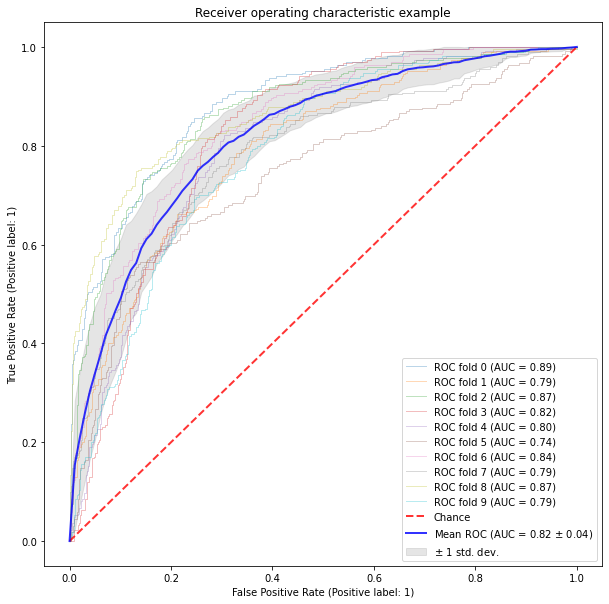

<Figure size 7200x7200 with 0 Axes>

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold


features_selected_set = avalanche_set[['Schneehöhe',
                                       'Lufttemperatur_7h',
                                       'Lufttemperatur_14h_Norm',
                                       'Lufttemperatur_14h_Gew',
                                       'Lufttemperatur_19h',
                                       'Lufttemperatur_19h_Norm',
                                       'Lufttemperatur_19h_Gew',
                                       'Schneetemperatur',
                                       'Schneetemperatur_Norm',
                                       'Schneetemperatur_Gew',
                                       'Windstärke',
                                       'Windstärke_Gew',
                                       'Einsinktiefe_Gew',
                                       'Wetter_akt',
                                       'Wetter_gestern',
                                       'Wolken',
                                       'Neuschnee_x',
                                       'Neuschnee_Norm',
                                       'Neuschnee_last4',
                                       'Lufttemperatur_last4',
                                       'meanExpo',
                                       'meanSlope',
                                       'MinSlope',
                                       'MaxSlope',
                                       'Altitude',
                                       'Avalanche']]
X = features_selected_set[features_selected_set.columns.drop('Avalanche')]
y = features_selected_set['Avalanche']
X = StandardScaler().fit_transform(X,y)


cv = StratifiedKFold(n_splits=10)
classifier = svm.SVC()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(10, 10))
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
plt.figure(figsize=(100, 100))
ax.legend(loc="lower right")
plt.show()

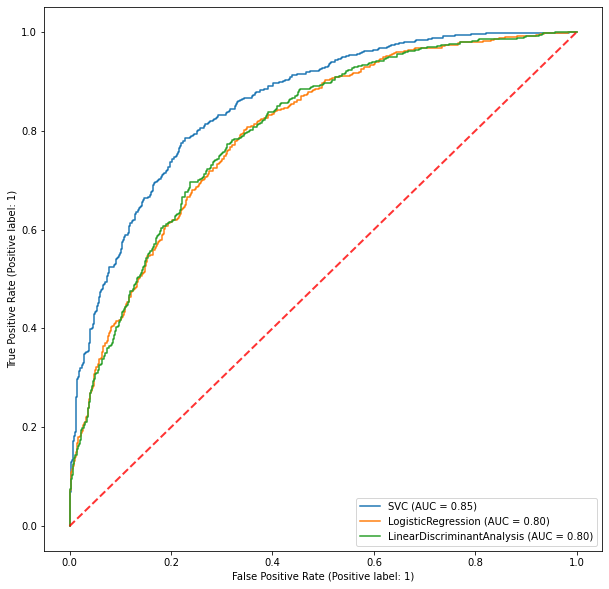

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression





features_selected_set = avalanche_set[['Schneehöhe',
                                       'Lufttemperatur_7h',
                                       'Lufttemperatur_14h_Norm',
                                       'Lufttemperatur_14h_Gew',
                                       'Lufttemperatur_19h',
                                       'Lufttemperatur_19h_Norm',
                                       'Lufttemperatur_19h_Gew',
                                       'Schneetemperatur',
                                       'Schneetemperatur_Norm',
                                       'Schneetemperatur_Gew',
                                       'Windstärke',
                                       'Windstärke_Gew',
                                       'Einsinktiefe_Gew',
                                       'Wetter_akt',
                                       'Wetter_gestern',
                                       'Wolken',
                                       'Neuschnee_x',
                                       'Neuschnee_Norm',
                                       'Neuschnee_last4',
                                       'Lufttemperatur_last4',
                                       'meanExpo',
                                       'meanSlope',
                                       'MinSlope',
                                       'MaxSlope',
                                       'Altitude',
                                       'Avalanche']]
X = features_selected_set[features_selected_set.columns.drop('Avalanche')]
y = features_selected_set['Avalanche']
X = StandardScaler().fit_transform(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = SVC(random_state=0).fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(10, 10))
svc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax)




features_selected_set = avalanche_set[['Schneehöhe',
                                       'Lufttemperatur_7h',
                                       'Lufttemperatur_14h_Gew',
                                       'Lufttemperatur_19h',
                                       'Lufttemperatur_19h_Norm',
                                       'Lufttemperatur_19h_Gew',
                                       'Schneetemperatur',
                                       'Einsinktiefe',
                                       'Wetter_akt',
                                       'Wetter_gestern',
                                       'Neuschnee_x',
                                       'Neuschnee_Norm',
                                       'Neuschnee_last4',
                                       'Lufttemperatur_last1',
                                       'Lufttemperatur_last4',
                                       'meanExpo',
                                       'meanSlope',
                                       'MinSlope',
                                       'MaxSlope',
                                       'Altitude',
                                       'Avalanche']]
X = features_selected_set[features_selected_set.columns.drop('Avalanche')]
y = features_selected_set['Avalanche']
X = StandardScaler().fit_transform(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = LogisticRegression().fit(X_train, y_train)
lr_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax)




features_selected_set = avalanche_set[['Schneehöhe',
                                       'Niederschlag',
                                       'Lufttemperatur_7h',
                                       'Lufttemperatur_7h_Gew',
                                       'Lufttemperatur_14h_Norm',
                                       'Lufttemperatur_14h_Gew',
                                       'Lufttemperatur_19h',
                                       'Schneetemperatur',
                                       'Windrichtung_Gew',
                                       'Windstärke_Norm',
                                       'Einsinktiefe_Norm',
                                       'Wetter_akt',
                                       'Neuschnee_Norm',
                                       'Neuschnee_last4',
                                       'Neuschnee_last2',
                                       'windstaerke_last1',
                                       'windstaerke_last2',
                                       'Lufttemperatur_last4',
                                       'meanExpo',
                                       'meanSlope',
                                       'stdDevSlope',
                                       'MinSlope',
                                       'MaxSlope',
                                       'Altitude',
                                       'Avalanche']]
X = features_selected_set[features_selected_set.columns.drop('Avalanche')]
y = features_selected_set['Avalanche']
X = StandardScaler().fit_transform(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = LinearDiscriminantAnalysis().fit(X_train, y_train)
lda_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.show()

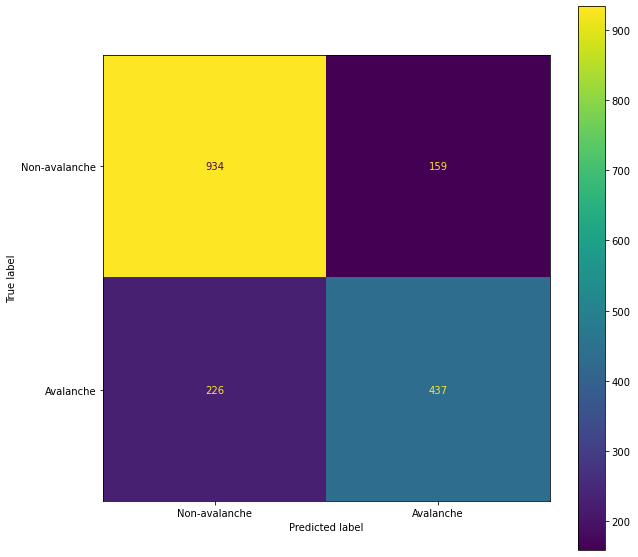

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


features_selected_set = avalanche_set[['Schneehöhe',
                                       'Lufttemperatur_7h',
                                       'Lufttemperatur_14h_Norm',
                                       'Lufttemperatur_14h_Gew',
                                       'Lufttemperatur_19h',
                                       'Lufttemperatur_19h_Norm',
                                       'Lufttemperatur_19h_Gew',
                                       'Schneetemperatur',
                                       'Schneetemperatur_Norm',
                                       'Schneetemperatur_Gew',
                                       'Windstärke',
                                       'Windstärke_Gew',
                                       'Einsinktiefe_Gew',
                                       'Wetter_akt',
                                       'Wetter_gestern',
                                       'Wolken',
                                       'Neuschnee_x',
                                       'Neuschnee_Norm',
                                       'Neuschnee_last4',
                                       'Lufttemperatur_last4',
                                       'meanExpo',
                                       'meanSlope',
                                       'MinSlope',
                                       'MaxSlope',
                                       'Altitude',
                                       'Avalanche']]
X = features_selected_set[features_selected_set.columns.drop('Avalanche')]
y = features_selected_set['Avalanche']
X = StandardScaler().fit_transform(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, )
svm = SVC().fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(10, 10))

ConfusionMatrixDisplay.from_estimator(estimator=svm,
                                      X=X_test,
                                      y=y_test,
                                      display_labels=["Non-avalanche", "Avalanche"],
                                      ax=ax)
plt.show()